3. Implement and test GLS (using the FM local search) with population size 50. The
 specific genetic algorithm is an incremental (or steady state) GA where there is no
 explicit notion of generations: each iteration two parents are randomly selected, use
 uniform crossover to generate one child, do FM local search on the child, let this
 optimized child compete with the worst solution in the population, if it is better or
 equal it replaces the worst solution. Are the GLS results statistically better/worse
 than MLS or ILS ?

In [1]:
import time
import statistics
import random
import pickle
import time

from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

from gls import GLS  

In [2]:
NUM_RUNS = 10
POP_SIZE = 50
MAX_ITERATIONS = 10_000
random_seeds = list(range(NUM_RUNS))

In [3]:
gls_cut_sizes = []
gls_times = []

for i in range(NUM_RUNS):
    seed = random_seeds[i]
    print(f"Starting GLS run {i+1}/{NUM_RUNS} with seed={seed}...")

    start_time = time.time()

    # Instantiate GLS (adapt to your constructor signature)
    gls = GLS(
        graph_filename="Graph500.txt",
        pop_size=POP_SIZE,
        max_iterations=MAX_ITERATIONS,
        random_seed=seed
    )

    best_cut_size = gls.run_gls()  

    end_time = time.time()
    elapsed = end_time - start_time

    # Record results
    gls_cut_sizes.append(best_cut_size)
    gls_times.append(elapsed)

    print(f"Run {i+1} done. Best cut size = {best_cut_size}, Time = {elapsed:.2f}s")


Starting GLS run 1/10 with seed=0...
Run 1 done. Best cut size = 9, Time = 794.54s
Starting GLS run 2/10 with seed=1...
Run 2 done. Best cut size = 6, Time = 770.71s
Starting GLS run 3/10 with seed=2...
Run 3 done. Best cut size = 7, Time = 755.39s
Starting GLS run 4/10 with seed=3...
Run 4 done. Best cut size = 10, Time = 754.90s
Starting GLS run 5/10 with seed=4...
Run 5 done. Best cut size = 5, Time = 755.46s
Starting GLS run 6/10 with seed=5...
Run 6 done. Best cut size = 8, Time = 755.32s
Starting GLS run 7/10 with seed=6...
Run 7 done. Best cut size = 8, Time = 756.55s
Starting GLS run 8/10 with seed=7...
Run 8 done. Best cut size = 12, Time = 758.76s
Starting GLS run 9/10 with seed=8...
Run 9 done. Best cut size = 7, Time = 755.86s
Starting GLS run 10/10 with seed=9...
Run 10 done. Best cut size = 8, Time = 757.09s


In [8]:
print("\n===== GLS (10 runs) Summary =====")
print("Cut sizes:", gls_cut_sizes)
print(f"Best cut size across 10 runs: {min(gls_cut_sizes)}")
print(f"Median cut size across 10 runs: {statistics.median(gls_cut_sizes)} , std dev: {statistics.pstdev(gls_cut_sizes):.2f}")
print(f"Mean cut size across 10 runs: {statistics.mean(gls_cut_sizes):.2f}")
print(f"Avg run time: {statistics.mean(gls_times):.2f}s  (Std Dev: {statistics.pstdev(gls_times):.2f}s)")


===== GLS (10 runs) Summary =====
Cut sizes: [9, 6, 7, 10, 5, 8, 8, 12, 7, 8]
Best cut size across 10 runs: 5
Median cut size across 10 runs: 8.0 , std dev: 1.90
Mean cut size across 10 runs: 8.00
Avg run time: 761.46s  (Std Dev: 11.90s)


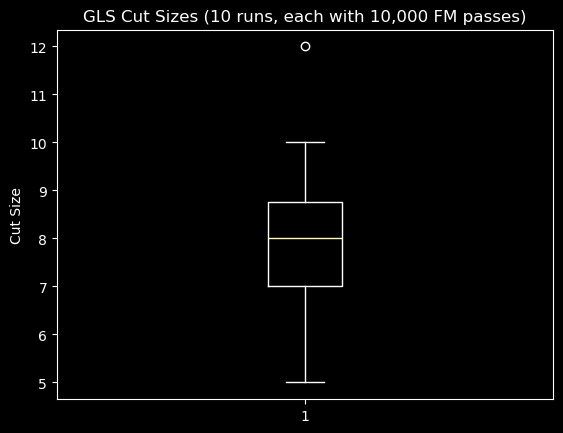

In [5]:
plt.boxplot(gls_cut_sizes)
plt.title("GLS Cut Sizes (10 runs, each with 10,000 FM passes)")
plt.ylabel("Cut Size")
plt.show()

In [6]:
gls_results_dict = {
    "cut_sizes": gls_cut_sizes,
    "run_times": gls_times
}

In [10]:
timestamp = time.strftime("%Y%m%d-%H%M%S")

solution_filename = f"solution_with_pop_size{POP_SIZE}_with_iter_{MAX_ITERATIONS}_seed{random_seeds}_{timestamp}.pkl"


In [11]:
gls_results_dict = {
    "cut_sizes": gls_cut_sizes,
    "run_times": gls_times,
    "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")  # readable timestamp inside the file
}

filename_timestamp = time.strftime("%Y%m%d_%H%M%S")  # e.g., 20250326_142301
pickle_filename = f"gls_results_{filename_timestamp}.pkl"

with open(pickle_filename, "wb") as f:
    pickle.dump(gls_results_dict, f)